## Vanilla Neural Network

### Importing libs

In [1]:
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import RMSprop,SGD,Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cv2
from keras_preprocessing.image import img_to_array
import tensorflow as tf
from keras.models import load_model

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

### load datasets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### preprocessing input data

In [6]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape, 'train samples')
print(X_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [7]:
X_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

###  preprocessing output data

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [10]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### initializing the parameters

In [11]:
NB_EPOCH = 30  # epoch -> iterations -> 20 to 200
BATCH_SIZE = 128 # multiples of 64
VERBOSE = 1 
NB_CLASSES = 10 # output classes

OPTIMIZER = RMSprop()
N_HIDDEN = 128  # multiples of 64
VALIDATION_SPLIT = 0.1

DROPOUT = 0.1
# graph = tf.get_default_graph()

Instructions for updating:
Colocations handled automatically by placer.


### model defining

In [12]:
# # simple architecture
# model = Sequential()

# model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))


# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
# # with hidden layers 
# model = Sequential()
# model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
# model.add(Activation('relu'))
# model.add(Dense(N_HIDDEN))
# model.add(Activation('relu'))
# model.add(Dense(N_HIDDEN))
# model.add(Activation('relu'))
# model.add(Dense(NB_CLASSES))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
__________

In [12]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

### training

In [13]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.3593 - acc: 0.8955 - val_loss: 0.1356 - val_acc: 0.9607
Epoch 2/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.1543 - acc: 0.9535 - val_loss: 0.0936 - val_acc: 0.9728
Epoch 3/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.1150 - acc: 0.9647 - val_loss: 0.0860 - val_acc: 0.9735
Epoch 4/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.0904 - acc: 0.9719 - val_loss: 0.0792 - val_acc: 0.9783
Epoch 5/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.0762 - acc: 0.9765 - val_loss: 0.0786 - val_acc: 0.9780
Epoch 6/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.0646 - acc: 0.9800 - val_loss: 0.0734 - val_acc: 0.9802
Epoch 7/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.

### testing

In [15]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.9804


### results visualization

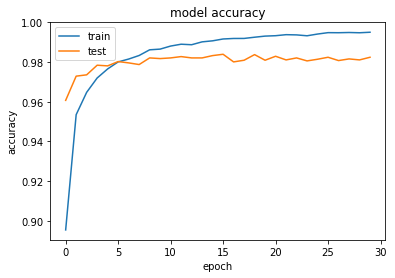

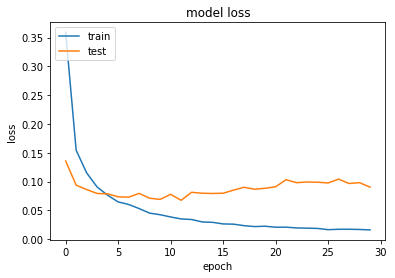

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### saving model

In [16]:
# method-1
model_json = model.to_json()
open('Maize-DL_architecture.json', 'w').write(model_json)
model.save_weights('Maize-DL_weights.h5', overwrite=True)

In [35]:
# method-2
model.save("./Deep_Learning/DL.model")

### Real-time prediction

In [2]:
img = cv2.imread("./Deep_Learning/zeros.png",0)

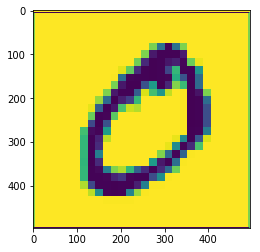

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img = cv2.resize(img,(28,28))

In [5]:
img = img_to_array(img)

In [6]:
img = np.expand_dims(img,axis=0)

In [7]:
img=img.reshape(1,784)

In [8]:
img.shape

(1, 784)

In [9]:
model = load_model("./Deep_Learning/DL.model")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [10]:
model.predict(img)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model.predict_classes(img)

array([2])

In [12]:
LoadedModel = load_model("./Deep_Learning/DL-Maize.model")

In [13]:
LoadedModel.predict([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
LoadedModel.predict_classes([img])[0]

2

In [42]:
LoadedModel.predict_proba([img])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Simple RNN

### importing libs

In [35]:
import numpy as np
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential

### loading datasets

In [36]:
fin = open("./Deep_Learning/11.txt", 'rb')
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()

text = " ".join(lines)

### character extraction and vectorization

In [39]:
chars = set(text)
nb_chars = len(chars)

char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))


In [43]:
index2char

{0: 'p',
 1: 'l',
 2: 'q',
 3: '_',
 4: 'k',
 5: 'd',
 6: '(',
 7: '7',
 8: '%',
 9: 'u',
 10: ':',
 11: 't',
 12: '2',
 13: ')',
 14: 'e',
 15: 'n',
 16: 'f',
 17: ']',
 18: '4',
 19: '6',
 20: '@',
 21: '$',
 22: 'm',
 23: 'h',
 24: 'r',
 25: ' ',
 26: '1',
 27: 'c',
 28: '0',
 29: 'y',
 30: '.',
 31: 'i',
 32: '9',
 33: 'z',
 34: 'x',
 35: 'a',
 36: ',',
 37: '5',
 38: '3',
 39: 'b',
 40: '[',
 41: '/',
 42: '?',
 43: '*',
 44: 's',
 45: '-',
 46: '#',
 47: 'g',
 48: '!',
 49: 'j',
 50: 'v',
 51: ';',
 52: '8',
 53: 'o',
 54: 'w'}

### separating input and output

In [44]:
SEQLEN = 10
STEP = 1
input_chars = []
label_chars = []

for i in range(0, len(text) - SEQLEN, STEP):
    input_chars.append(text[i:i + SEQLEN])
    label_chars.append(text[i + SEQLEN])


In [45]:
input_chars[:5]

['project gu', 'roject gut', 'oject gute', 'ject guten', 'ect gutenb']

In [13]:
label_chars[:5]

['t', 'e', 'n', 'b', 'e']

In [46]:
len(input_chars),len(label_chars)

(158773, 158773)

### creating 3D vector matrix for input

In [47]:
X = np.zeros((len(input_chars), SEQLEN, nb_chars), dtype=np.bool)#5000 x 10 x 55
y = np.zeros((len(input_chars), nb_chars), dtype=np.bool)



In [48]:
X[1]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, Fa

In [49]:
for i, input_char in enumerate(input_chars):
    for j, ch in enumerate(input_char):
        X[i, j, char2index[ch]] = 1
        y[i, char2index[label_chars[i]]] = 1

In [50]:
X[1]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, Fa

### model defining

In [51]:
HIDDEN_SIZE = 128
BATCH_SIZE = 128
NUM_ITERATIONS = 20
NUM_EPOCHS_PER_ITERATION = 1
NUM_PREDS_PER_EPOCH = 100

model = Sequential()
model.add(SimpleRNN(HIDDEN_SIZE, return_sequences=False,input_shape=(SEQLEN, nb_chars),unroll=True))
model.add(Dense(nb_chars))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="rmsprop")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               23552     
_________________________________________________________________
dense_4 (Dense)              (None, 55)                7095      
_________________________________________________________________
activation_4 (Activation)    (None, 55)                0         
Total params: 30,647
Trainable params: 30,647
Non-trainable params: 0
_________________________________________________________________


### training

In [52]:
model.fit(X, y, batch_size=BATCH_SIZE, epochs=NUM_ITERATIONS)

Epoch 1/20
158773/158773 [==============================] - 8s 49us/step - loss: 2.3362
Epoch 2/20
158773/158773 [==============================] - 7s 43us/step - loss: 2.0463
Epoch 3/20
158773/158773 [==============================] - 7s 43us/step - loss: 1.9458
Epoch 4/20
158773/158773 [==============================] - 7s 43us/step - loss: 1.8686
Epoch 5/20
158773/158773 [==============================] - 7s 43us/step - loss: 1.8060
Epoch 6/20
158773/158773 [==============================] - 6s 39us/step - loss: 1.7526
Epoch 7/20
158773/158773 [==============================] - 6s 39us/step - loss: 1.7073
Epoch 8/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.6695
Epoch 9/20
158773/158773 [==============================] - 6s 40us/step - loss: 1.6365
Epoch 10/20
158773/158773 [==============================] - 6s 41us/step - loss: 1.6084
Epoch 11/20
158773/158773 [==============================] - 6s 41us/step - loss: 1.5828
Epoch 12/20
158773/158773 [===

### prediction

In [56]:
test_chars = "rabbit hol"
print("Generating from seed: %s" % (test_chars))
output = test_chars


Generating from seed: rabbit hol


In [57]:
for i in range(NUM_PREDS_PER_EPOCH):
    Xtest = np.zeros((1, SEQLEN, nb_chars))
    for i, ch in enumerate(test_chars):
        Xtest[0, i, char2index[ch]] = 1
    pred = model.predict(Xtest, verbose=0)[0]
    ypred = index2char[np.argmax(pred)]
    output += ypred
    test_chars = test_chars[1:] + ypred


In [58]:
output

'rabbit hold into a little she sat her head of minding a botered the rabbit her a long the project gutenberg-tm'

## LSTM

### importing libs

In [27]:
import collections

import matplotlib.pyplot as plt
import nltk
import numpy as np
from keras.layers.core import Activation, Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [28]:
maxlen = 0
word_freqs = collections.Counter()
num_recs = 0

In [29]:
ftrain = open("./Deep_Learning/training.txt", "r")

for line in ftrain:
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freqs[word] += 1
    num_recs += 1
ftrain.close()

In [30]:
maxlen

42

In [31]:
len(word_freqs)

2328

In [49]:
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 20

In [50]:
vocab_size = min(MAX_FEATURES, len(word_freqs)) + 2
word2index = {x[0]: i+2 for i, x in enumerate(word_freqs.most_common(MAX_FEATURES))}
word2index["PAD"] = 0
word2index["UNK"] = 1
index2word = {v:k for k, v in word2index.items()}

In [51]:
X = np.empty((num_recs, ), dtype=list)
y = np.zeros((num_recs, ))
i = 0

ftrain = open("./Deep_Learning/training.txt", "r")

for i,line in enumerate(ftrain):
    label, sentence = line.strip().split("\t")
    words = nltk.word_tokenize(sentence.lower())
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i += 1
ftrain.close()


In [52]:
X[15]

[2, 59, 10, 9, 387]

In [53]:
X = sequence.pad_sequences(X, maxlen=MAX_SENTENCE_LENGTH)

In [54]:
X[15]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,  59,  10,   9, 387], dtype=int32)

In [55]:
X.shape

(7086, 20)

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE,input_length=MAX_SENTENCE_LENGTH))
model.add(Dropout(0.2))
model.add(LSTM(HIDDEN_LAYER_SIZE, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 128)           256256    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 305,729
Trainable params: 305,729
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(Xtrain, ytrain, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,validation_data=(Xtest, ytest))

Train on 5668 samples, validate on 1418 samples
Epoch 1/10
5668/5668 [==============================] - 5s 945us/step - loss: 0.2391 - acc: 0.8924 - val_loss: 0.0625 - val_acc: 0.9760
Epoch 2/10
5668/5668 [==============================] - 4s 644us/step - loss: 0.0222 - acc: 0.9928 - val_loss: 0.0866 - val_acc: 0.9817
Epoch 3/10
5668/5668 [==============================] - 4s 646us/step - loss: 0.0139 - acc: 0.9965 - val_loss: 0.0496 - val_acc: 0.9838
Epoch 4/10
5668/5668 [==============================] - 4s 653us/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.0530 - val_acc: 0.9852
Epoch 5/10
5668/5668 [==============================] - 4s 652us/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0478 - val_acc: 0.9852
Epoch 6/10
5668/5668 [==============================] - 4s 654us/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0746 - val_acc: 0.9852
Epoch 7/10
5668/5668 [==============================] - 4s 656us/step - loss: 6.1219e-04 - acc: 0.9998 - val_loss: 0.0864 - val_acc: 0.9

In [61]:
score, acc = model.evaluate(Xtest, ytest, batch_size=BATCH_SIZE)
print("Test score: %.3f, accuracy: %.3f" % (score, acc))

1418/1418 [==============================] - 0s 120us/step
Test score: 0.064, accuracy: 0.985


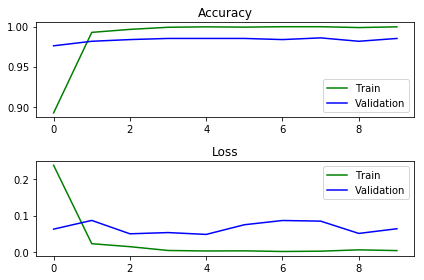

In [62]:
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="g", label="Train")
plt.plot(history.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")
plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color="g", label="Train")
plt.plot(history.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [66]:
for i in range(5):
    idx = np.random.randint(len(Xtest))
    xtest = Xtest[idx].reshape(1,20)
    ylabel = ytest[idx]
    ypred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0].tolist() if x != 0])
    print("Predicted\tActual\t\tsentence")
    print("%.0f\t\t%d\t\t%s" % (ypred, ylabel, sent))

Predicted	Actual		sentence
1		1		i either love brokeback mountain or think it 's great that homosexuality is becoming more acceptable ! :
Predicted	Actual		sentence
0		0		does it take for you to get really mad -- when people say harry potter sucks ...
Predicted	Actual		sentence
1		1		i love harry potter .
Predicted	Actual		sentence
1		1		harry potter is awesome i do n't care if anyone says differently ! ..
Predicted	Actual		sentence
0		0		does it take for you to get really mad -- when people say harry potter sucks ...
